In [244]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os

In [313]:
dir_name = "../output3"
gt_dir = "../data/test3"
gt_files = os.listdir(gt_dir)
print(gt_files)
files = os.listdir(dir_name)
print(files)
data = []
for file in files:
    with open(os.path.join(dir_name, file), 'r') as f:
        data.append(eval(f.read()))


['output.avi', 'output.txt']
['Flow_Clear_dfov.txt', 'ORB_Clear_dfov.txt']


In [314]:
dfs= []

for experiment in data:
    df = pd.DataFrame(experiment, columns=["x", "y", "x_gt", "y_gt", "l2"])
    dfs.append(df)


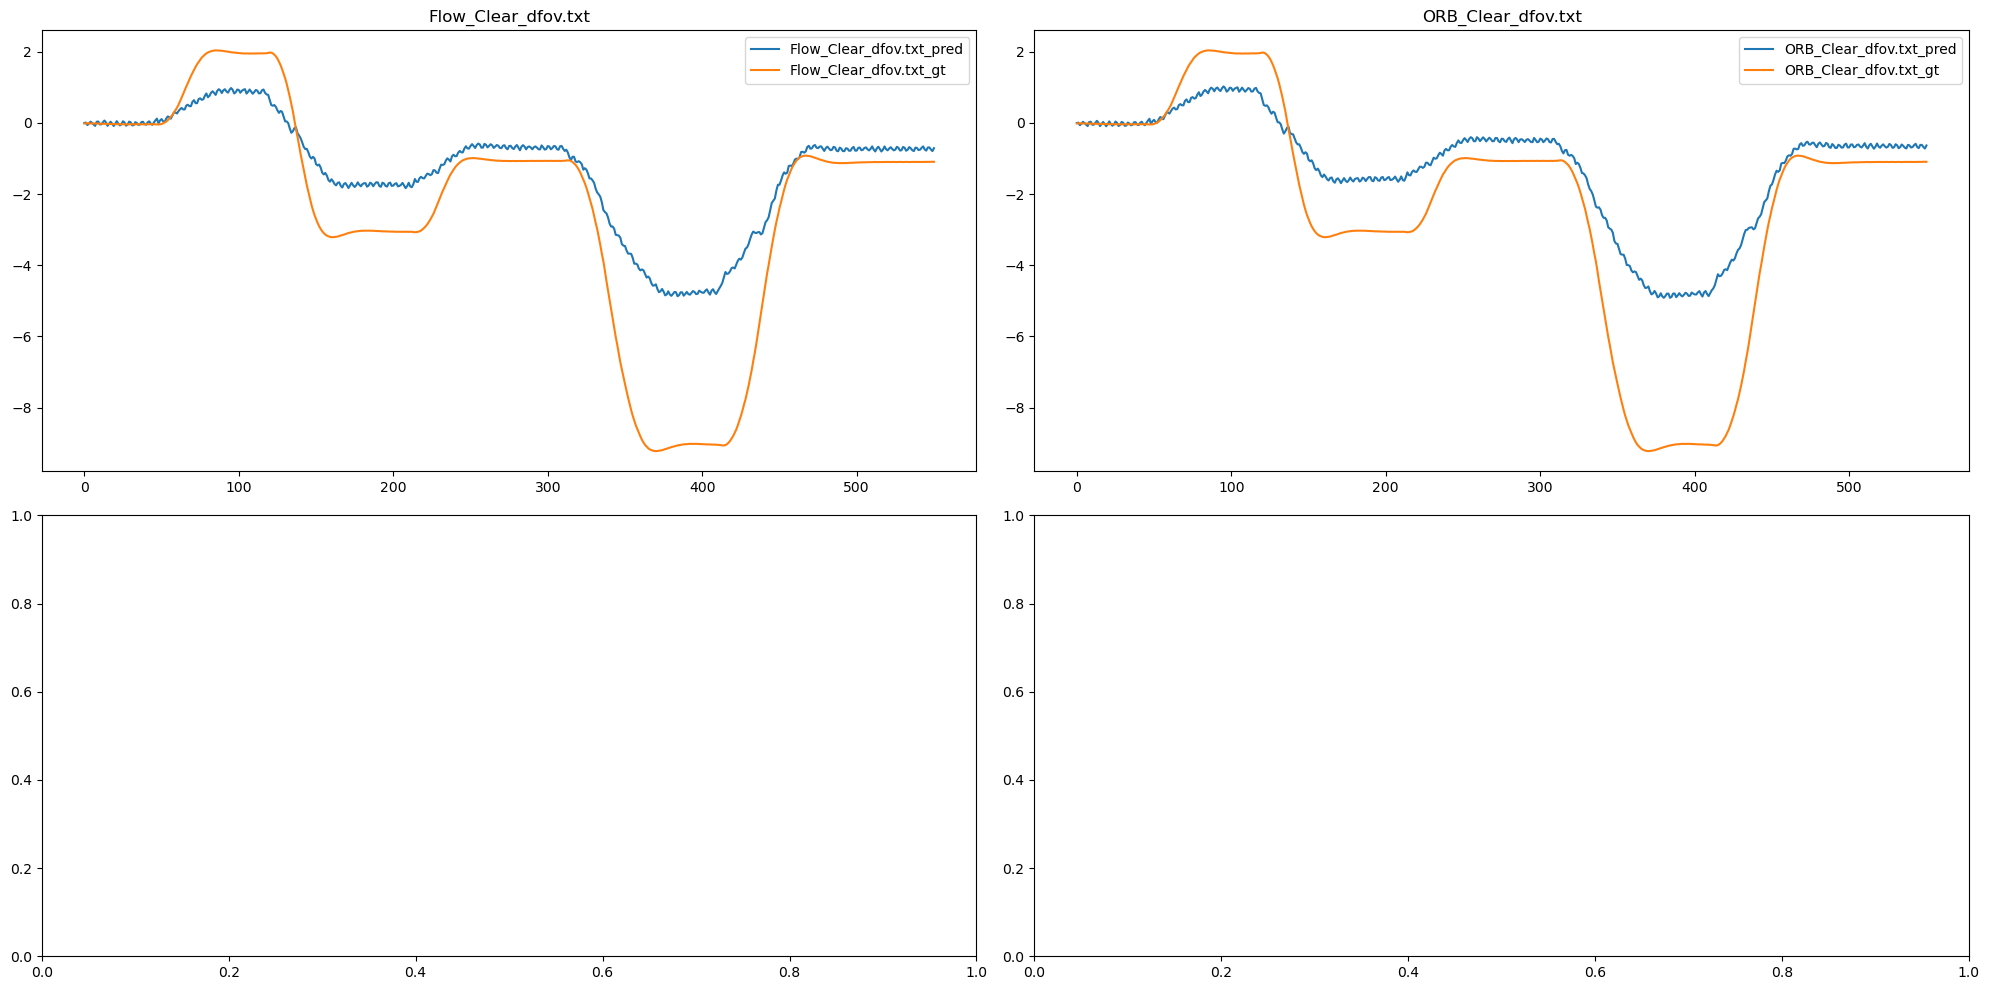

In [315]:
fix, axes = plt.subplots(len(dfs)//2+1, 2, figsize=(20, 10))
for i, df in enumerate(dfs):
    t = np.arange(len(dfs[i]))
    ax = axes[i // 2, i % 2]
    ax.plot(t, df["x"].to_numpy(), label=f"{files[i]}_pred")
    ax.plot(t, df["x_gt"].to_numpy(), label=f"{files[i]}_gt")
    ax.set_title(files[i])
    ax.legend()
plt.tight_layout()
plt.show()

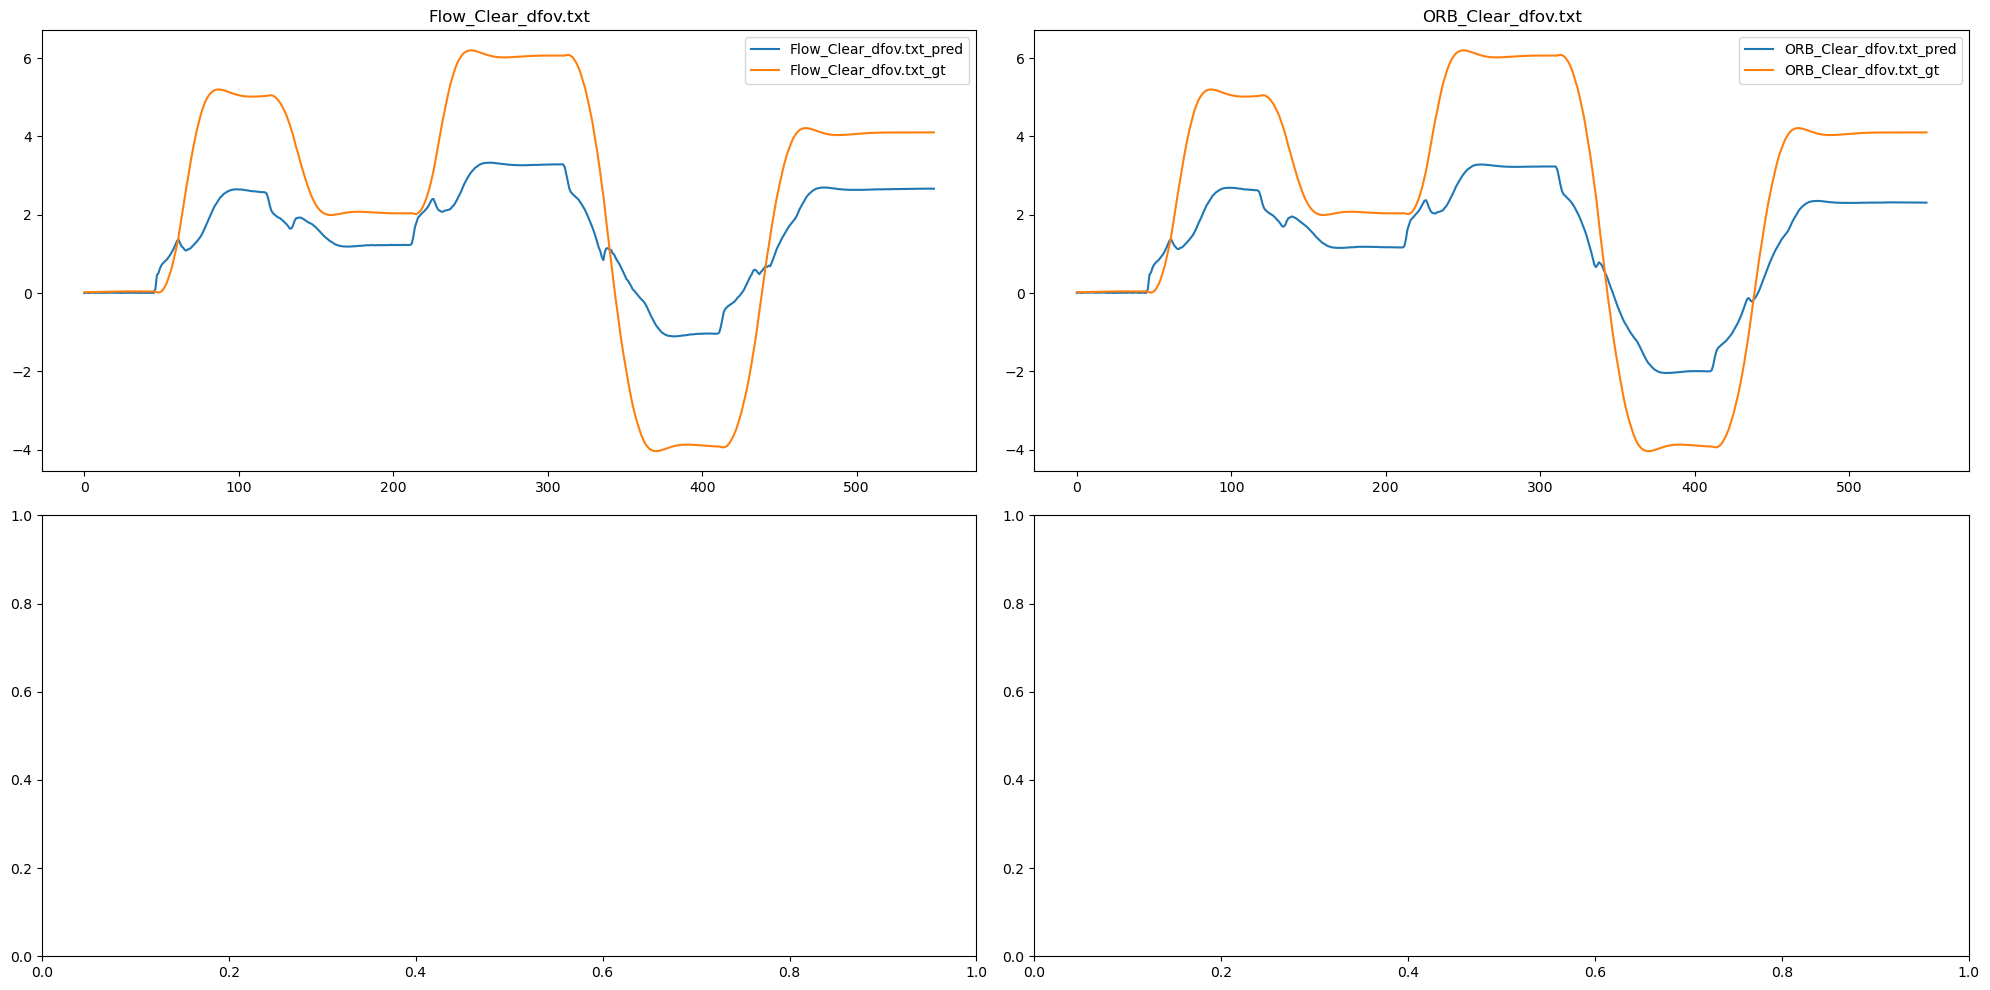

In [316]:
fix, axes = plt.subplots(len(dfs)//2+1, 2, figsize=(20, 10))
for i, df in enumerate(dfs):
    t = np.arange(len(dfs[i]))
    ax = axes[i // 2, i % 2]
    ax.plot(t, df["y"].to_numpy(), label=f"{files[i]}_pred")
    ax.plot(t, df["y_gt"].to_numpy(), label=f"{files[i]}_gt")
    ax.set_title(files[i])
    ax.legend()
plt.tight_layout()
plt.show()

Flow_Clear_dfov.txt 3.7861107569687804 4.550614114512764 2.4527331542649726
ORB_Clear_dfov.txt 3.867664937565984 4.047808633029322 2.478208450090744


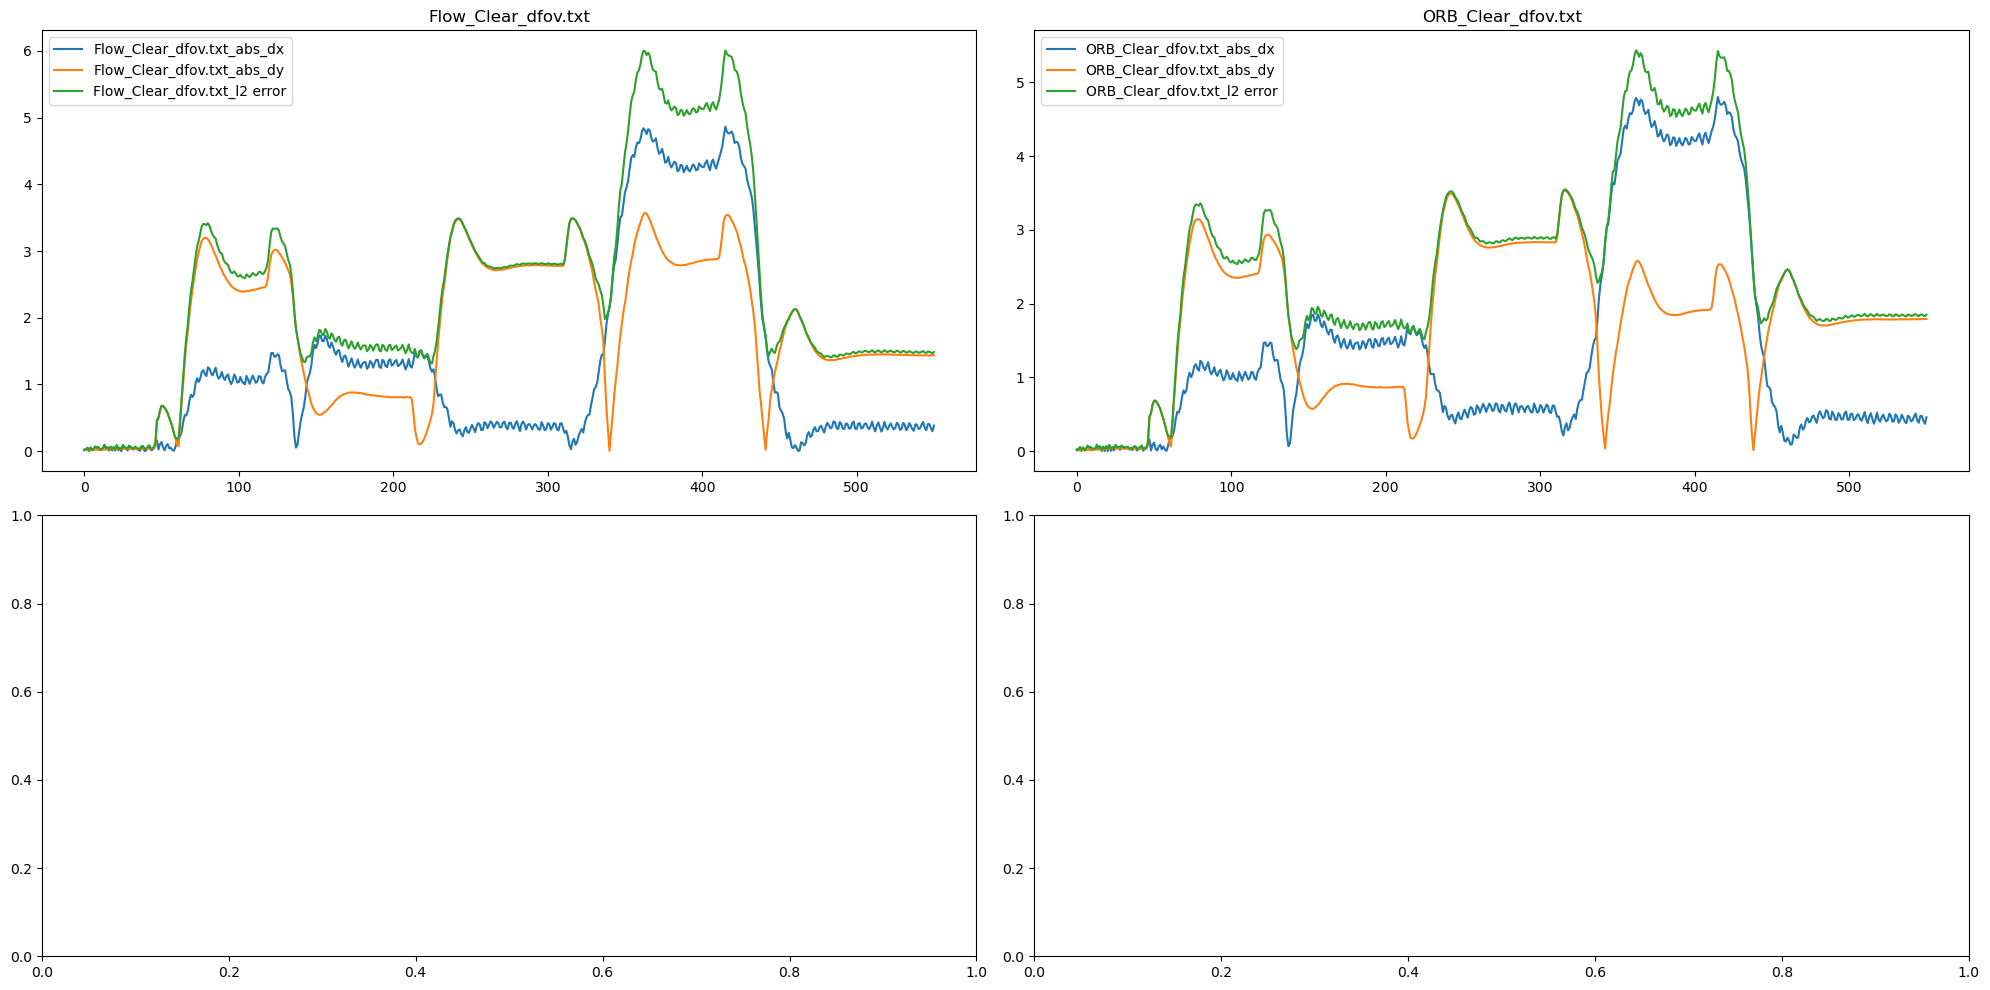

In [317]:
fix, axes = plt.subplots(len(dfs)//2+1, 2, figsize=(20, 10))
for i, df in enumerate(dfs):
    t = np.arange(len(dfs[i]))
    dx  = np.abs(df["x"].to_numpy() - df["x_gt"].to_numpy())
    dy  = np.abs(df["y"].to_numpy() - df["y_gt"].to_numpy())
    ax = axes[i // 2, i % 2]
    ax.plot(t, dx, label=f"{files[i]}_abs_dx")
    ax.plot(t, dy, label=f"{files[i]}_abs_dy")
    ax.plot(t, df["l2"].to_numpy(), label=f"{files[i]}_l2 error")

    mse_x = np.mean(np.square(dx))
    mse_y = np.mean(np.square(dy))
    print(files[i], mse_x.mean(), mse_y.mean(), df["l2"].mean())

    ax.set_title(files[i])
    ax.legend()
plt.tight_layout()
plt.show()

1.781125400069326 1.548561531592421
Flow_Clear_dfov.txt finall err: 0.8151211233024516, avg err: 1.265344621788634
1.8942998051011273 1.8465159358177312
ORB_Clear_dfov.txt finall err: 0.3625988028695762, avg err: 0.9178259091031099


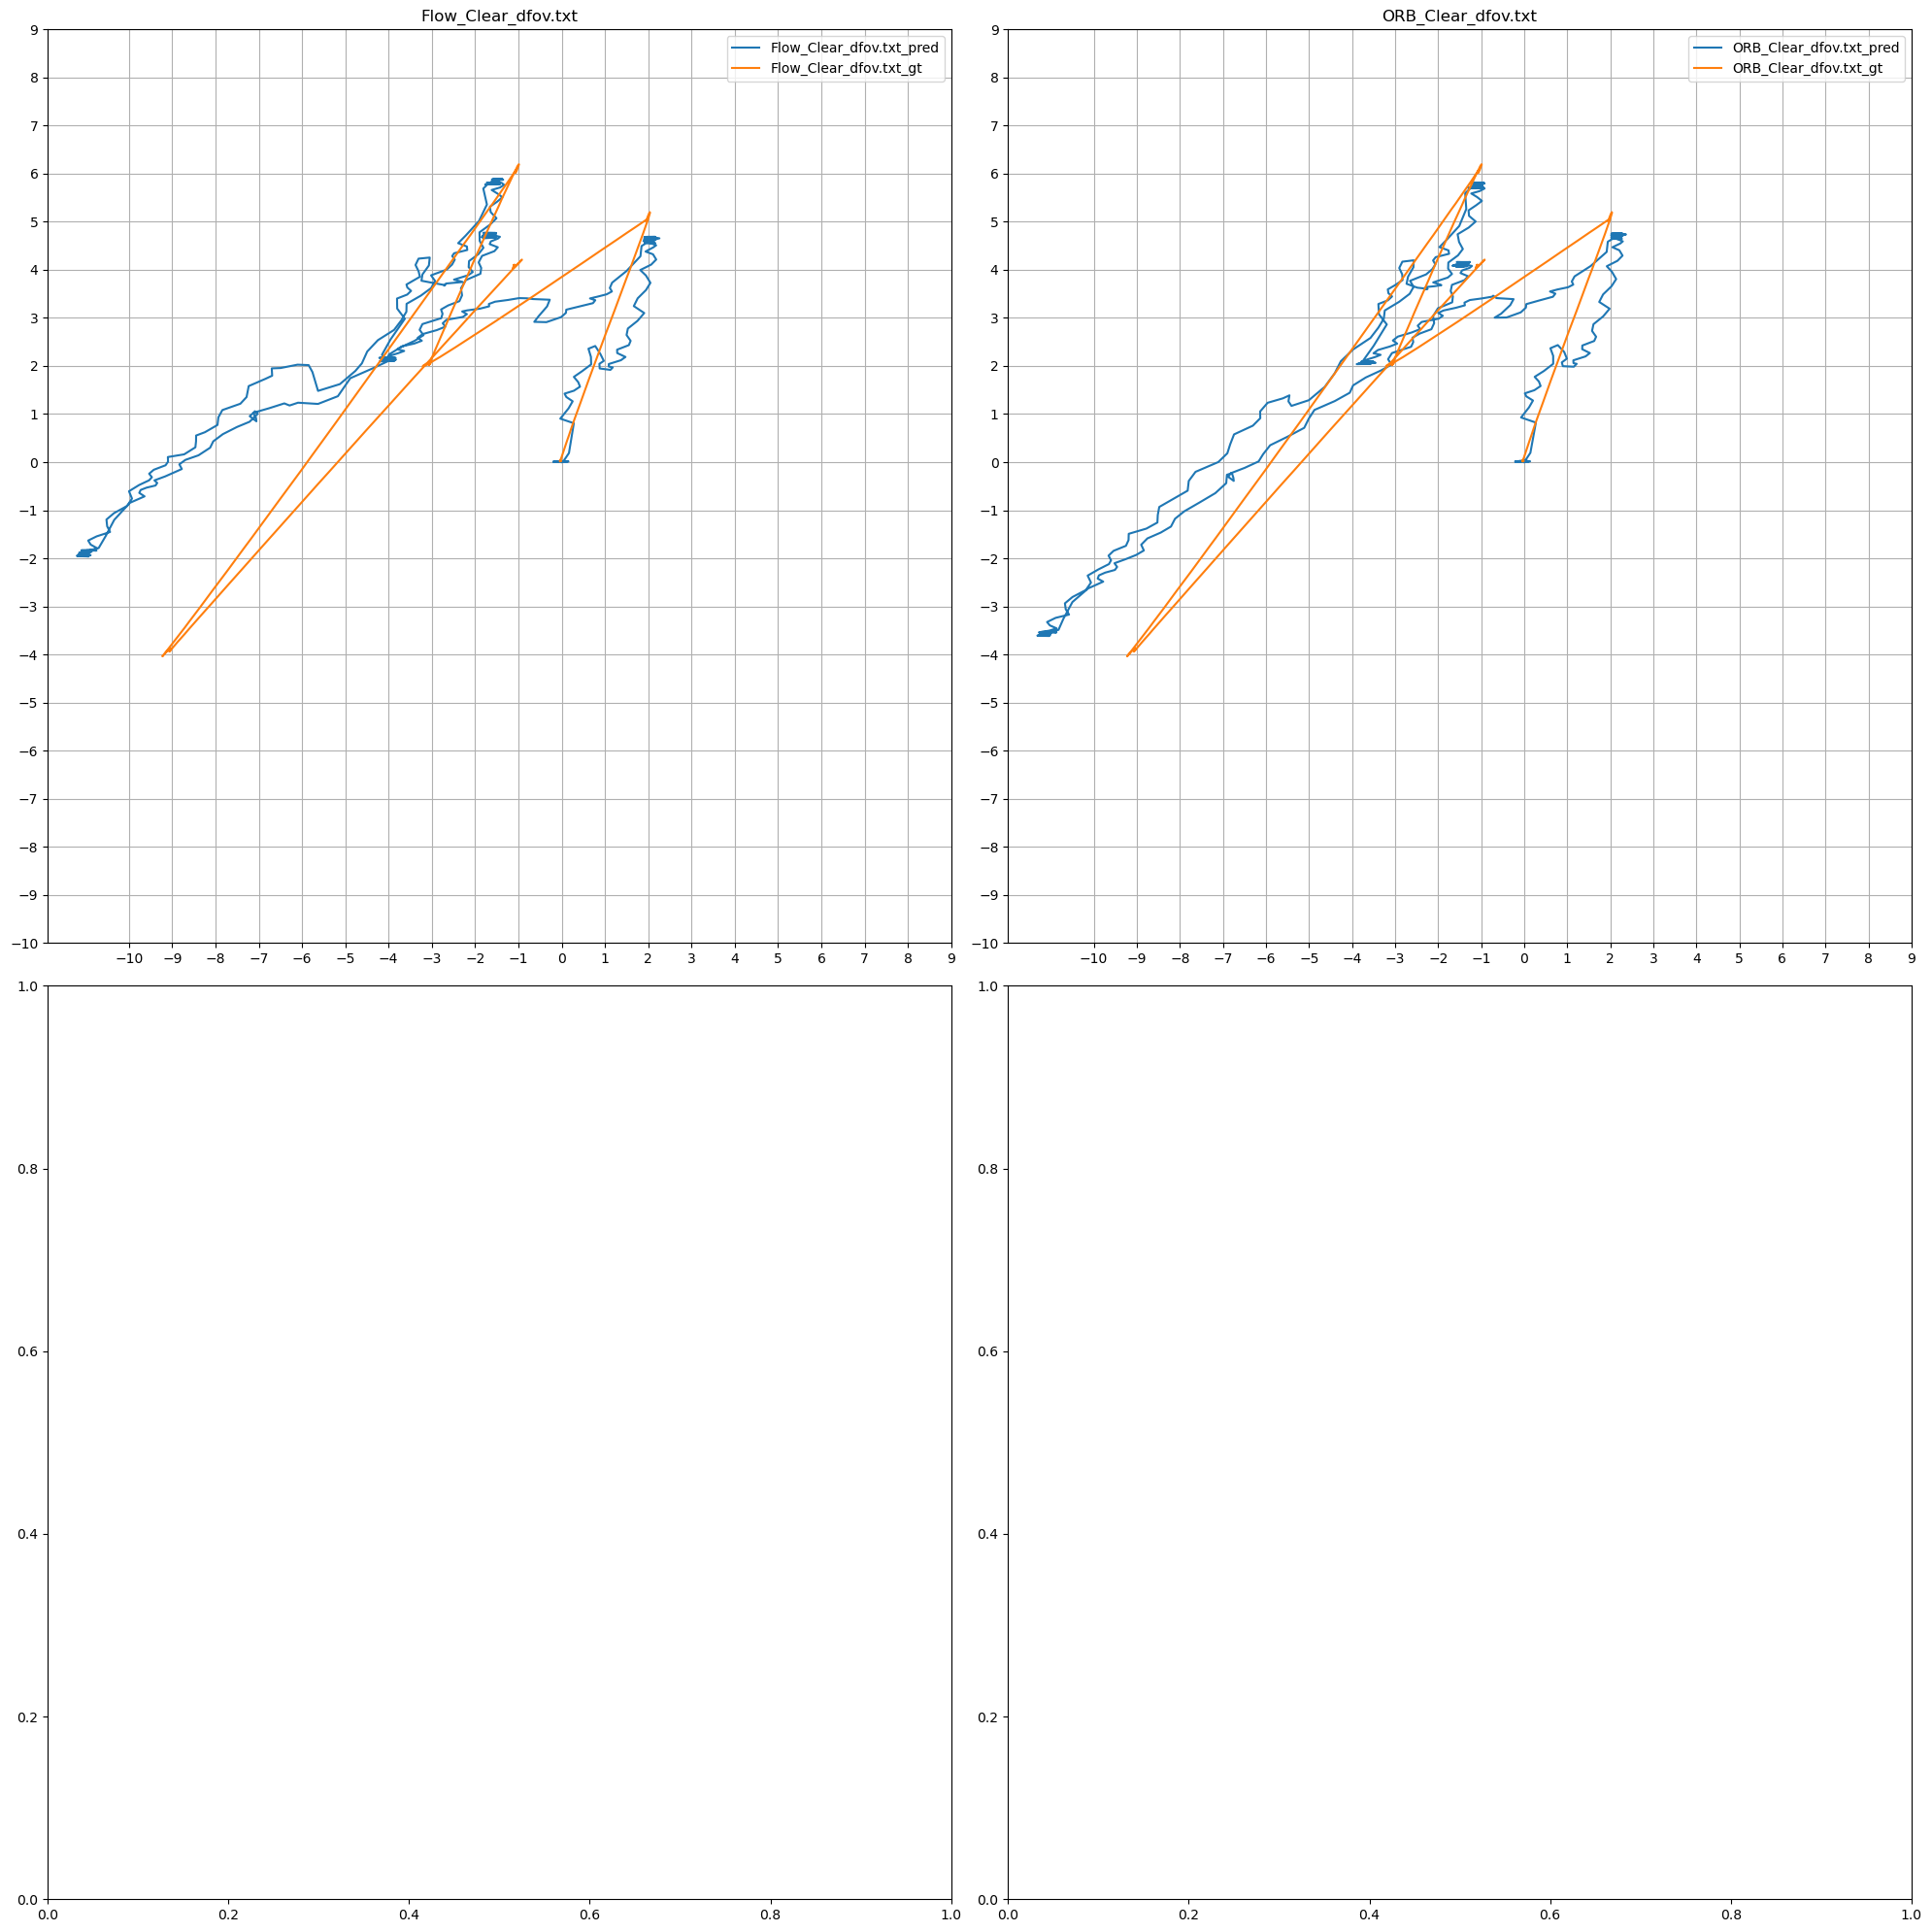

In [318]:
fig, axes = plt.subplots(len(dfs)//2+1, 2, figsize=(20, 20))

for i, df in enumerate(dfs):
    ax = axes[i // 2, i % 2]
    x_c = 2.3
    y_c = 1.77
    ax.plot(df["x"].to_numpy() * x_c , df["y"].to_numpy() * y_c, label=f"{files[i]}_pred")
    ax.plot(df["x_gt"].to_numpy(), df["y_gt"].to_numpy(), label=f"{files[i]}_gt")
    print((df["x_gt"].to_numpy().mean() / df ["x"].to_numpy().mean()), (df["y_gt"].to_numpy().mean() / df ["y"].to_numpy().mean()))
    euclidean = np.sqrt((df["x"].to_numpy() * x_c - df["x_gt"].to_numpy())**2 + (df["y"].to_numpy() * y_c - df["y_gt"].to_numpy())**2)
    print(f"{files[i]} finall err: {euclidean[-1]}, avg err: {euclidean.mean()}")
    ax.set_title(files[i])
    ax.set_xticks(np.arange(-10, 10, 1))
    ax.set_yticks(np.arange(-10, 10, 1))
    ax.grid()
    ax.legend()
plt.tight_layout()
plt.show()




In [251]:
gt_data = pd.read_csv(os.path.join(gt_dir, gt_files[1]))
print(gt_data)
print(gt_data.columns)

      ID      Roll     Pitch   LinAccX   LinAccY   LinAccZ   AngVelX  \
0      1  0.003589  0.000012  0.003979  0.044804 -10.51700 -0.441551   
1      2  0.003293  0.000034  0.001185  0.017829  -9.52585  0.521259   
2      3 -0.005405  0.000027  0.002820 -0.068135 -10.18080  0.290948   
3      4 -0.005978  0.000048  0.000916 -0.065738  -9.50133 -0.007433   
4      5  0.004460 -0.000052 -0.002190  0.065067 -10.37240 -0.345140   
..   ...       ...       ...       ...       ...       ...       ...   
459  460 -0.007480  0.006559 -0.002989 -0.022627  -9.28832 -0.587393   
460  461  0.000059  0.006251 -0.002006  0.062284  -9.92781 -0.161345   
461  462 -0.001047  0.005889 -0.010344  0.026477  -9.45627  0.495540   
462  463 -0.006979  0.005272  0.009651 -0.035609 -10.24030  0.552043   
463  464 -0.005263  0.004822 -0.002646 -0.000557  -9.95546 -0.611908   

      AngVelY   AngVelZ     PoseX     PoseY    PoseZ  Unnamed: 12  
0    0.001543  0.000541 -0.017251  0.013671  9.86224          NaN  

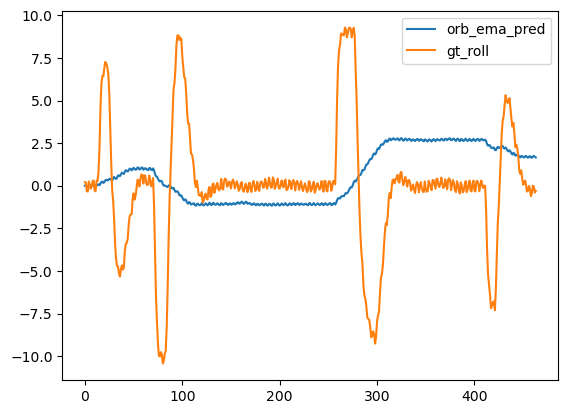

In [252]:
orb_ema = dfs[0]
t = np.arange(len(orb_ema))
plt.plot(t, orb_ema["x"].to_numpy(), label=f"orb_ema_pred")
plt.plot(t, np.rad2deg(gt_data["Roll"].to_numpy()), label=f"gt_roll")
plt.legend()

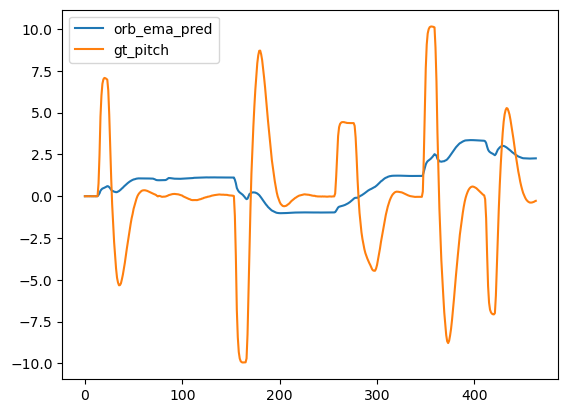

In [253]:
plt.plot(t, orb_ema["y"].to_numpy(), label=f"orb_ema_pred")
plt.plot(t, -np.rad2deg(gt_data["Pitch"].to_numpy()), label=f"gt_pitch")
plt.legend()
